In [1]:
# takes 20m for 3m hand records.
# perform par score training experiments on augmented hand records using fastai/pytorch framework.

# next steps:
# hand_records_experiments_par_score.ipynb experiments with the trained data?

# previous steps:
# acbl_hand_records_augment.ipynb created acbl_hand_records_augmented.pkl

# todo:
# save/load trained weights for new inferences.
# move OHE Hands encodings into acbl_hand_records_augmented.pkl?
# how does estimated par score compare to club players? Within 5% of expert?
# think of more features that can make par score predictions more accurate.
# why are worst-case par score pedictions wrong? Wrong because of unusual break in hands?
# Possible to compare par score predictions with normalized hands? i.e. hands which consist of the most common distributions.

In [2]:
import pandas as pd
import pathlib
import pickle
import re
import sys
from collections import defaultdict
from IPython.display import display # needed to define display() method in vscode

In [ ]:
sys.path.append(str(pathlib.Path.cwd().parent))
sys.path
from mlBridgeLib import mlBridgeLib

In [3]:
# override pandas display options
mlBridgeLib.pd_options_display()

In [4]:
rootPath = pathlib.Path('e:/bridge/data')
acblPath = rootPath.joinpath('acbl')
savedModelsPath = acblPath.joinpath('SavedModels')
# create parent directories in case they don't already exist.
savedModelsPath.mkdir(parents=True, exist_ok=True)

In [5]:
# takes 35s
# load augmented_df
acbl_hand_records_augmented_filename = 'acbl_hand_records_augmented.pkl'
acbl_hand_records_augmented_file = acblPath.joinpath(acbl_hand_records_augmented_filename)
augmented_df = pd.read_pickle(acbl_hand_records_augmented_file)
augmented_df

,ref,hand_record_id,event_id,Board,EventBoard,Dealer,Vul,board_record_string,Hands,Par,DDmakes,DD_N_C,DD_N_D,DD_N_H,DD_N_S,DD_N_N,DD_E_C,DD_E_D,DD_E_H,DD_E_S,DD_E_N,DD_S_C,DD_S_D,DD_S_H,DD_S_S,DD_S_N,DD_W_C,DD_W_D,DD_W_H,DD_W_S,DD_W_N,Hands_Bin,HB_N,HB_E,HB_S,HB_W,HCP,HCP_N,HCP_N_S,HCP_N_H,HCP_N_D,HCP_N_C,HCP_E,HCP_E_S,HCP_E_H,HCP_E_D,HCP_E_C,HCP_S,HCP_S_S,HCP_S_H,HCP_S_D,HCP_S_C,HCP_W,HCP_W_S,HCP_W_H,HCP_W_D,HCP_W_C,QT,QT_N,QT_N_S,...,CT_NS_H,CT_NS_S,CT_NS_N,CT_EW_C,CT_EW_D,CT_EW_H,CT_EW_S,CT_EW_N,CT_NS_C_Pass,CT_NS_C_Partial,CT_NS_C_Game,CT_NS_C_SSlam,CT_NS_C_GSlam,CT_NS_D_Pass,CT_NS_D_Partial,CT_NS_D_Game,CT_NS_D_SSlam,CT_NS_D_GSlam,CT_NS_H_Pass,CT_NS_H_Partial,CT_NS_H_Game,CT_NS_H_SSlam,CT_NS_H_GSlam,CT_NS_S_Pass,CT_NS_S_Partial,CT_NS_S_Game,CT_NS_S_SSlam,CT_NS_S_GSlam,CT_NS_N_Pass,CT_NS_N_Partial,CT_NS_N_Game,CT_NS_N_SSlam,CT_NS_N_GSlam,CT_EW_C_Pass,CT_EW_C_Partial,CT_EW_C_Game,CT_EW_C_SSlam,CT_EW_C_GSlam,CT_EW_D_Pass,CT_EW_D_Partial,CT_EW_D_Game,CT_EW_D_SSlam,CT_EW_D_GSlam,CT_EW_H_Pass,CT_EW_H_Partial,CT_EW_H_Game,CT_EW_H_SSlam,CT_EW_H_GSlam,CT_EW_S_Pass,CT_EW_S_Partial,CT_EW_S_Game,CT_EW_S_SSlam,CT_EW_S_GSlam,CT_EW_N_Pass,CT_EW_N_Partial,CT_EW_N_Game,CT_EW_N_SSlam,CT_EW_N_GSlam,Vul_NS,Vul_EW
0,"(acbl, 2620401)",77908,100961,09,200217A_09,N,E_W,ST6HK32DJ2CAJ9874SQJ942H765DT874CQSA853HQDKQ963CK52SK7HAJT984DA5CT63,"((T6, K32, J2, AJ9874), (A853, Q, KQ963, K52), (K7, AJT984, A5, T63), (QJ942, 765, T874, Q))","(200, [(4, S, *, EW, -1)])","((10, 4, 10, 4, 8), (2, 9, 3, 9, 2), (10, 4, 10, 4, 8), (2, 9, 3, 9, 2))",10,4,10,4,8,2,9,3,9,2,10,4,10,4,8,2,9,3,9,2,"((0b100010000010000000001100010000000011001011100100, (0b100010000, 0b100000000011, 0b1000000001...",0b100010000010000000001100010000000011001011100100,0b1000001001010001000000000001100100100100100000001001,0b100000100000100111100010010000000010000000100010010,0b11010000101000000011100000001011001000010000000000,"((9, (0, 3, 1, 5)), (14, (4, 2, 5, 3)), (12, (3, 5, 4, 0)), (5, (3, 0, 0, 2)))",9,0,3,1,5,14,4,2,5,3,12,3,5,4,0,5,3,0,0,2,"(6.5, ((1.5, (0, 0.5, 0, 1)), (2.5, (1, 0, 1, 0.5)), (2.5, (0.5, 1, 1, 0)), (0, (0, 0, 0, 0))))",1.50,0.00,...,Game,Pass,Partial,Pass,Partial,Pass,Partial,Pass,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True
1,"(acbl, 2620412)",77908,100961,20,200217A_20,W,Both,ST85HKJDJ43CKJ873SQ32HA643DK96CT94SAJ64HT98DT75CA52SK97HQ752DAQ82CQ6,"((T85, KJ, J43, KJ873), (AJ64, T98, T75, A52), (K97, Q752, AQ82, Q6), (Q32, A643, K96, T94))","(90, [(1, D, , NS, 1), (1, C, , NS, 1), (1, N, , NS, 0)])","((8, 8, 7, 7, 7), (4, 5, 6, 6, 6), (8, 8, 7, 7, 7), (4, 5, 6, 6, 6))",8,8,7,7,7,4,5,6,6,6,8,8,7,7,7,4,5,6,6,6,"((0b101001000010100000000000010000001100101001100010, (0b101001000, 0b101000000000, 0b1000000110...",0b101001000010100000000000010000001100101001100010,0b1001000010100000011100000000001001010001000000001001,0b100010100000001000010100110100010000010010000010000,0b10000000011100000001011001000100100000000110000100,"((9, (0, 4, 1, 4)), (9, (5, 0, 0, 4)), (13, (3, 2, 6, 2)), (9, (2, 4, 3, 0)))",9,0,4,1,4,9,5,0,0,4,13,3,2,6,2,9,2,4,3,0,"(6.5, ((1.0, (0, 0.5, 0, 0.5)), (2, (1, 0, 0, 1)), (2.0, (0.5, 0, 1.5, 0)), (1.5, (0, 1, 0.5, 0))))",1.00,0.00,...,Partial,Partial,Partial,Pass,Pass,Pass,Pass,Pass,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True
2,"(acbl, 2620411)",77908,100961,19,200217A_19,S,E_W,STH764DAQ92CQJ653SQJ763HKJTD65CAKTSK984H5DT8743C987SA52HAQ9832DKJC42,"((T, 764, AQ92, QJ653), (K984, 5, T8743, 987), (A52, AQ9832, KJ, 42), (QJ763, KJT, 65, AKT))","(140, [(3

In [6]:
# obsolete?
# better to use these instead of dict?
# df["column_category"].cat.categories.get_loc("item") # returns location of item
# df["column_category"].cat.categories[0] # returns item at ith position
d = dict(enumerate(augmented_df['Par_Score'].cat.categories))
len(augmented_df),d

(2962269,
 {0: -2220,
  1: -2210,
  2: -2140,
  3: -2000,
  4: -1700,
  5: -1520,
  6: -1510,
  7: -1440,
  8: -1430,
  9: -1400,
  10: -1370,
  11: -1100,
  12: -990,
  13: -980,
  14: -920,
  15: -800,
  16: -660,
  17: -650,
  18: -630,
  19: -620,
  20: -600,
  21: -500,
  22: -460,
  23: -450,
  24: -430,
  25: -420,
  26: -400,
  27: -300,
  28: -200,
  29: -140,
  30: -130,
  31: -120,
  32: -110,
  33: -100,
  34: -90,
  35: -80,
  36: -70,
  37: 0,
  38: 70,
  39: 80,
  40: 90,
  41: 100,
  42: 110,
  43: 120,
  44: 130,
  45: 140,
  46: 200,
  47: 300,
  48: 400,
  49: 420,
  50: 430,
  51: 450,
  52: 460,
  53: 500,
  54: 600,
  55: 620,
  56: 630,
  57: 650,
  58: 660,
  59: 800,
  60: 920,
  61: 980,
  62: 990,
  63: 1100,
  64: 1370,
  65: 1400,
  66: 1430,
  67: 1440,
  68: 1510,
  69: 1520,
  70: 1700,
  71: 2000,
  72: 2140,
  73: 2210,
  74: 2220})

In [7]:
# take 4m
# convert Hands to OHE (One Hot Encoding)
tupled_handsl = augmented_df['Hands']
bin_handsl = mlBridgeLib.HandsLToBin(tupled_handsl)
print(len(bin_handsl),bin_handsl[:2])
ohe_handsl = mlBridgeLib.BinLToOHE(bin_handsl)
print(len(ohe_handsl),ohe_handsl[:2])
assert len(ohe_handsl[0]) == 52*4
retupled_handsl = mlBridgeLib.OHEToHandsL(ohe_handsl)
print(len(retupled_handsl),retupled_handsl[:2])
assert len(tupled_handsl) == len(retupled_handsl)
assert tupled_handsl[0] == retupled_handsl[0]
ohe_handsl[:2]

2962269 [('0b100010000010000000001100010000000011001011100100', '0b1000001001010001000000000001100100100100100000001001', '0b100000100000100111100010010000000010000000100010010', '0b11010000101000000011100000001011001000010000000000'), ('0b101001000010100000000000010000001100101001100010', '0b1001000010100000011100000000001001010001000000001001', '0b100010100000001000010100110100010000010010000010000', '0b10000000011100000001011001000100100000000110000100')]
2962269 [(0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

[(0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,


In [8]:
# takes 2m
# create dataframe of OHE hands
ohe_hands_df = pd.DataFrame(ohe_handsl,index=augmented_df.index,columns=[nesw+suit+denom for nesw in mlBridgeLib.NESW for suit in mlBridgeLib.SHDC for denom in mlBridgeLib.ranked_suit],dtype='int8')
ohe_hands_df

,NSA,NSK,NSQ,NSJ,NST,NS9,NS8,NS7,NS6,NS5,NS4,NS3,NS2,NHA,NHK,NHQ,NHJ,NHT,NH9,NH8,NH7,NH6,NH5,NH4,NH3,NH2,NDA,NDK,NDQ,NDJ,NDT,ND9,ND8,ND7,ND6,ND5,ND4,ND3,ND2,NCA,NCK,NCQ,NCJ,NCT,NC9,NC8,NC7,NC6,NC5,NC4,NC3,NC2,ESA,ESK,ESQ,ESJ,EST,ES9,ES8,ES7,...,SC9,SC8,SC7,SC6,SC5,SC4,SC3,SC2,WSA,WSK,WSQ,WSJ,WST,WS9,WS8,WS7,WS6,WS5,WS4,WS3,WS2,WHA,WHK,WHQ,WHJ,WHT,WH9,WH8,WH7,WH6,WH5,WH4,WH3,WH2,WDA,WDK,WDQ,WDJ,WDT,WD9,WD8,WD7,WD6,WD5,WD4,WD3,WD2,WCA,WCK,WCQ,WCJ,WCT,WC9,WC8,WC7,WC6,WC5,WC4,WC3,WC2
0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0
5,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,1,...,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
7,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0
8,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,1,0
9,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,1,0,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [9]:
# takes 4m-14m
import fastai.tabular.all

# dependent variable column names
dep_vars = ['Par_Score']

# continuous valued column names
cont_names = ['Vul_NS', 'Vul_EW']
cont_names += ['SL_N_S', 'SL_N_H', 'SL_N_D', 'SL_N_C']
cont_names += ['HCP_NS', 'HCP_EW']
cont_names += ['HCP_N_S', 'HCP_N_H', 'HCP_N_D', 'HCP_N_C']
cont_names += ['HCP_S_S', 'HCP_S_H', 'HCP_S_D', 'HCP_S_C']
cont_names += ['HCP_E_S', 'HCP_E_H', 'HCP_E_D', 'HCP_E_C']
cont_names += ['HCP_W_S', 'HCP_W_H', 'HCP_W_D', 'HCP_W_C']
cont_names += ['QT_N_S', 'QT_N_H', 'QT_N_D', 'QT_N_C']
cont_names += dep_vars

# categorical valued column names. fastai wants ints.
# better?
#cat_names = list(df.select_dtypes(['category']).columns)
#df[cat_names] = df[cat_names].apply(lambda x: x.cat.codes)
cat_names = ['SL_Max_NS', 'SL_Max_EW']

#split = fastai.tabular.all.RandomSplitter(valid_pct=0.2)(fastai.tabular.all.range_of(df))
valid = pd.Series(augmented_df['EventBoard'].between("210601","210701"),name='Valid',dtype='bool') # note: using augmented_df instead of df for split
df = pd.concat([augmented_df[cont_names+cat_names],valid,ohe_hands_df],axis='columns')
display(df.head())

cont_names += ohe_hands_df.columns.to_list()
for n in cat_names:
    df[n] = df[n].cat.codes
cont_names += cat_names
cat_names = []
print(cont_names, cat_names)

# current fastai/pytorch has a bug where bool is treated as object and thus erroring out.
for n in augmented_df: # only care about bool columns originating from augmented_df, ignoring others.
    if n in df and pd.api.types.is_bool_dtype(df[n]):
        df[n] = df[n].astype('uint8')

# special case catagoricals: catagoricals which are to be made into continuous
df = df.astype({'Par_Score':'int16'})

# create fastai dataloader
procs = [fastai.tabular.all.Normalize] # fastai.tabular.all.Categorify, fastai.tabular.all.FillMissing, 
y_names = dep_vars
# valid_idx specifies a list of indexes to validation rows.
valid_idx = df[df['Valid']].index
bs = 1024 # fastai results weird out at > 1024 (on 1660ti).
device = 'cuda' # 'cuda' or 'cpu'
# interaction problem between specifying all cont_names, cat_names and valid_idx.
dls = fastai.tabular.all.TabularDataLoaders.from_df(df, proc=procs, cont_names=cont_names, cat_names=cat_names,
    y_names=y_names, valid_idx=valid_idx, bs=bs, device=device, verbose=True) # max is len(df)-len(valid_idx)

# create fastai tabular_learner from dataloader
layers = [65536, 2048, 1024]
metrics = fastai.tabular.all.accuracy_multi if len(y_names) else fastai.tabular.all.accuracy
learn = fastai.tabular.all.tabular_learner(dls, layers=layers, metrics=metrics)

# fit data
learn.fit(1)

,Vul_NS,Vul_EW,SL_N_S,SL_N_H,SL_N_D,SL_N_C,HCP_NS,HCP_EW,HCP_N_S,HCP_N_H,HCP_N_D,HCP_N_C,HCP_S_S,HCP_S_H,HCP_S_D,HCP_S_C,HCP_E_S,HCP_E_H,HCP_E_D,HCP_E_C,HCP_W_S,HCP_W_H,HCP_W_D,HCP_W_C,QT_N_S,QT_N_H,QT_N_D,QT_N_C,Par_Score,SL_Max_NS,SL_Max_EW,Valid,NSA,NSK,NSQ,NSJ,NST,NS9,NS8,NS7,NS6,NS5,NS4,NS3,NS2,NHA,NHK,NHQ,NHJ,NHT,NH9,NH8,NH7,NH6,NH5,NH4,NH3,NH2,NDA,NDK,...,SC9,SC8,SC7,SC6,SC5,SC4,SC3,SC2,WSA,WSK,WSQ,WSJ,WST,WS9,WS8,WS7,WS6,WS5,WS4,WS3,WS2,WHA,WHK,WHQ,WHJ,WHT,WH9,WH8,WH7,WH6,WH5,WH4,WH3,WH2,WDA,WDK,WDQ,WDJ,WDT,WD9,WD8,WD7,WD6,WD5,WD4,WD3,WD2,WCA,WCK,WCQ,WCJ,WCT,WC9,WC8,WC7,WC6,WC5,WC4,WC3,WC2
0,False,True,2,3,2,6,21,19,0,3,1,5,3,5,4,0,4,2,5,3,3,0,0,2,0.00,0.50,0.00,1.00,200,SL_NS_H,SL_EW_S,False,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,True,True,3,2,3,5,22,18,0,4,1,4,3,2,6,2,5,0,0,4,2,4,3,0,0.00,0.50,0.00,0.50,90,SL_NS_D,SL_EW_S,False,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
2,False,True,1,3,4,5,23,17,0,0,6,3,4,6,4,0,3,0,0,0,3,4,0,7,0.00,0.00,1.50,0.00,140,SL_NS_H,SL_EW_S,False,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
3,True,False,1,6,2,4,12,28,0,3,1,1,4,3,0,0,1,4,7,9,5,0,2,0,0.00,0.00,0.00,0.00,-460,SL_NS_H,SL_EW_D,False,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0
4,True,True,1,5,2,5,13,27,0,2,0,7,0,1,2,1,2,3,4,2,8,4,4,0,0.00,0.00,0.00,2.00,-1430,SL_NS_H,SL_EW_S,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0


['Vul_NS', 'Vul_EW', 'SL_N_S', 'SL_N_H', 'SL_N_D', 'SL_N_C', 'HCP_NS', 'HCP_EW', 'HCP_N_S', 'HCP_N_H', 'HCP_N_D', 'HCP_N_C', 'HCP_S_S', 'HCP_S_H', 'HCP_S_D', 'HCP_S_C', 'HCP_E_S', 'HCP_E_H', 'HCP_E_D', 'HCP_E_C', 'HCP_W_S', 'HCP_W_H', 'HCP_W_D', 'HCP_W_C', 'QT_N_S', 'QT_N_H', 'QT_N_D', 'QT_N_C', 'Par_Score', 'NSA', 'NSK', 'NSQ', 'NSJ', 'NST', 'NS9', 'NS8', 'NS7', 'NS6', 'NS5', 'NS4', 'NS3', 'NS2', 'NHA', 'NHK', 'NHQ', 'NHJ', 'NHT', 'NH9', 'NH8', 'NH7', 'NH6', 'NH5', 'NH4', 'NH3', 'NH2', 'NDA', 'NDK', 'NDQ', 'NDJ', 'NDT', 'ND9', 'ND8', 'ND7', 'ND6', 'ND5', 'ND4', 'ND3', 'ND2', 'NCA', 'NCK', 'NCQ', 'NCJ', 'NCT', 'NC9', 'NC8', 'NC7', 'NC6', 'NC5', 'NC4', 'NC3', 'NC2', 'ESA', 'ESK', 'ESQ', 'ESJ', 'EST', 'ES9', 'ES8', 'ES7', 'ES6', 'ES5', 'ES4', 'ES3', 'ES2', 'EHA', 'EHK', 'EHQ', 'EHJ', 'EHT', 'EH9', 'EH8', 'EH7', 'EH6', 'EH5', 'EH4', 'EH3', 'EH2', 'EDA', 'EDK', 'EDQ', 'EDJ', 'EDT', 'ED9', 'ED8', 'ED7', 'ED6', 'ED5', 'ED4', 'ED3', 'ED2', 'ECA', 'ECK', 'ECQ', 'ECJ', 'ECT', 'EC9', 'EC8', 'EC7

epoch,train_loss,valid_loss,accuracy_multi,time
0,846.021851,390.900818,0.507987,15:18


In [10]:
# show validation data
augmented_df[df['Valid']]['EventBoard']

5012       210605A_04
5013       210605A_07
5014       210605A_10
5015       210605A_13
5016       210605A_20
5017       210605A_23
5018       210605A_26
5019       210605A_29
5020       210605A_36
5021       210605A_03
5022       210605A_06
5023       210605A_09
5024       210605A_16
5025       210605A_19
5026       210605A_22
5027       210605A_25
5028       210605A_32
5029       210605A_35
5030       210605A_01
5031       210605A_08
5032       210605A_11
5033       210605A_14
5034       210605A_17
5035       210605A_24
5036       210605A_27
              ...    
2962136    210606A_22
2962137    210606A_16
2962138    210606A_31
2962139    210606A_21
2962140    210606A_04
2962141    210606A_26
2962142    210606A_13
2962143    210606A_28
2962144    210606A_12
2962145    210606A_11
2962146    210606A_17
2962147    210606A_20
2962148    210606A_25
2962149    210606A_23
2962150    210606A_10
2962151    210606A_09
2962152    210606A_32
2962153    210606A_03
2962154    210606A_24
2962155   

In [11]:
# save model
latest_model_file = savedModelsPath.joinpath('LatestModel')
learn.save(latest_model_file) # defaults to .pth

Path('e:/bridge/data/acbl/SavedModels/LatestModel.pth')

In [12]:
# load model
latest_model_file = savedModelsPath.joinpath('LatestModel')
learn.load(latest_model_file) # defaults to .pth

In [13]:
# takes 15s
# show predictions
preds, actuals = learn.get_preds()
len(preds), len(actuals), preds, actuals

(119639,
 119639,
 tensor([[ 633.0742],
         [-126.0526],
         [-140.5475],
         ...,
         [-101.4304],
         [ 104.7710],
         [-633.3620]]),
 tensor([[ 630],
         [-110],
         [-120],
         ...,
         [-100],
         [ 120],
         [-600]], dtype=torch.int16))

In [14]:
pd.DataFrame(preds).value_counts()

-667.96     72
-622.49     72
1545.55     72
-659.90     71
-636.29     71
-136.34     71
282.75      71
-1443.45    71
116.65      71
449.89      71
-784.78     71
-168.06     71
102.77      71
413.22      71
653.09      71
-127.80     71
120.10      71
-114.90     71
490.90      71
-478.08     71
-459.40     71
-127.47     71
417.04      71
-689.80     71
412.96      70
            ..
-151.34      1
-151.34      1
-151.33      1
-151.33      1
-151.33      1
-151.32      1
-151.32      1
-151.31      1
-151.31      1
-151.31      1
-151.31      1
-151.30      1
-151.30      1
-151.30      1
-151.29      1
-151.29      1
-151.29      1
-151.28      1
-151.27      1
-151.27      1
-151.27      1
-151.26      1
-151.26      1
-151.26      1
2718.46      1
Length: 64747, dtype: int64

In [15]:
# takes 10s
# create dataframe of predictions
valid_idx = df[df['Valid']].index
df_preds = pd.concat([df,pd.DataFrame(preds,index=valid_idx,columns=[n+'_pred' for n in y_names])],axis='columns')
for n in y_names:
    df_preds.loc[valid_idx,n+'_var'] = df_preds[n]-df_preds[n+'_pred']
df_preds.sort_index(axis=1, inplace=True)
dep_var_cols = [n+suffix for n in y_names for suffix in ['','_pred','_var']]
valid = df_preds.loc[valid_idx]
valid[dep_var_cols]

,Par_Score,Par_Score_pred,Par_Score_var
5012,630,633.07,-3.07
5013,-110,-126.05,16.05
5014,-120,-140.55,20.55
5015,600,593.70,6.30
5016,-130,-130.90,0.90
5017,140,134.51,5.49
5018,-110,-131.33,21.33
5019,660,672.03,-12.03
5020,-660,-668.22,8.22
5021,110,98.36,11.64


In [16]:
# save df_preds
df_preds_file = savedModelsPath.joinpath('LatestModel.pkl')
df_preds.to_pickle(df_preds_file)

In [17]:
valid[['Par_Score','Par_Score_pred','Par_Score_var']]

,Par_Score,Par_Score_pred,Par_Score_var
5012,630,633.07,-3.07
5013,-110,-126.05,16.05
5014,-120,-140.55,20.55
5015,600,593.70,6.30
5016,-130,-130.90,0.90
5017,140,134.51,5.49
5018,-110,-131.33,21.33
5019,660,672.03,-12.03
5020,-660,-668.22,8.22
5021,110,98.36,11.64


In [18]:
valid['Par_Score_pred'].value_counts()

1545.55     72
-667.96     72
-622.49     72
-659.90     71
-478.08     71
282.75      71
-459.40     71
-127.80     71
-127.47     71
116.65      71
417.04      71
-1443.45    71
413.22      71
-136.34     71
-689.80     71
-784.78     71
-114.90     71
449.89      71
102.77      71
120.10      71
490.90      71
-168.06     71
653.09      71
-636.29     71
412.96      70
            ..
-130.64      1
-152.37      1
130.59       1
-153.08      1
627.12       1
-146.59      1
-109.04      1
-639.19      1
-164.93      1
1466.00      1
661.84       1
-98.27       1
106.00       1
125.35       1
-623.45      1
-120.03      1
932.86       1
-536.29      1
-128.36      1
-144.19      1
-123.12      1
-444.51      1
-487.17      1
-452.65      1
104.77       1
Name: Par_Score_pred, Length: 64747, dtype: int64

<AxesSubplot:>

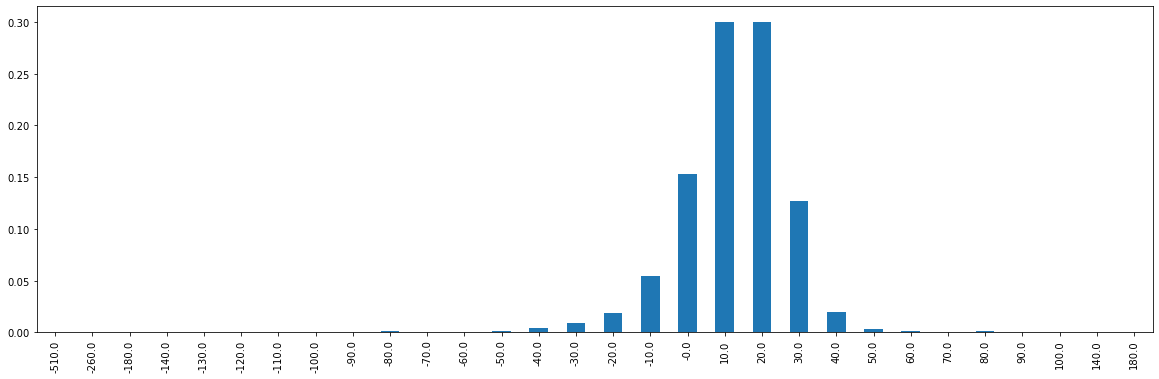

In [21]:
valid['Par_Score_var'].astype('float32').round(-1).value_counts(normalize=True).sort_index().plot(kind='bar',figsize=(20,6))